In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression


In [2]:
# Load your dataset
df = pd.read_csv("Salary_dataset.csv")

# Explore the dataset
print(df.head())
print(df.info())


   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None


In [3]:
# Handle missing values if any
df = df.dropna()

# Separate features and target variable
X = df.drop('Salary', axis=1)
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Choose and train your model
model = LinearRegression() 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [5]:
# You can use the trained model to predict new values
new_values = np.array([[5,10]])  # Insert your new values
new_predictions = model.predict(new_values)
print("Predictions for new values:", new_predictions)

Predictions for new values: [383003.43647506]


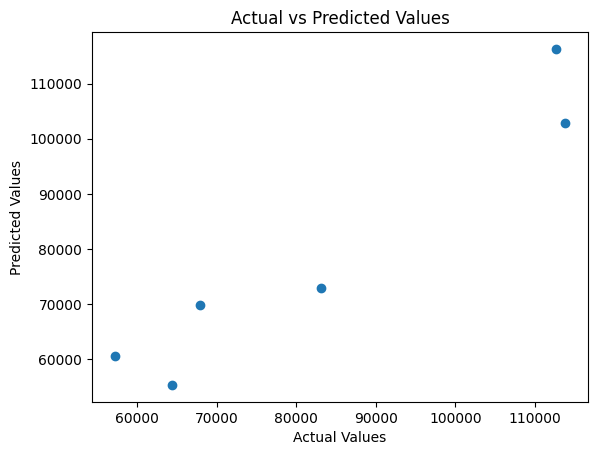

In [6]:
# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [7]:
# Evaluate the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 6515.681891615335
Root Mean Squared Error: 7449.436094861281
